In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [385]:
# reading the data
data = pd.read_csv('moments.csv', index_col=None)

# predictors
X = data.drop('dist', axis=1)

# response variable
y = data['dist']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=10)

# scaling the data
#X_train_scaled = scale(X_train)
#X_test_scaled = scale(X_test)

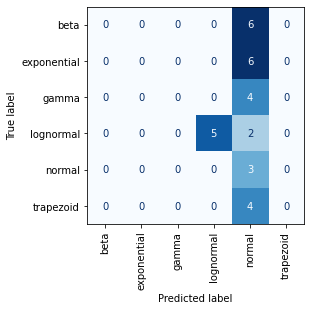

In [386]:
clf_svm = SVC(random_state=10, kernel='rbf')
clf_svm.fit(X_train, y_train)

y_pred = clf_svm.predict(X_test)

c_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(c_matrix, display_labels=clf_svm.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False, xticks_rotation='vertical')
plt.show()

In [387]:
param_grid = [
    {'C':np.linspace(0.1, 25, 20),
     'gamma':np.linspace(0.001, 10, 20), 
     'kernel':['rbf']},
]

optimal_params = GridSearchCV(SVC(), param_grid,cv=10, verbose=0)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 5.342105263157894, 'gamma': 0.5272631578947369, 'kernel': 'rbf'}


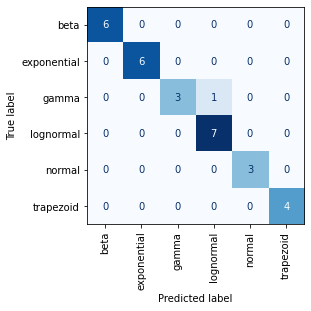

In [388]:
c = optimal_params.best_params_['C']
g = optimal_params.best_params_['gamma']

clf_svm = SVC(random_state=10, C=c, gamma=g)
clf_svm.fit(X_train, y_train)

y_pred = clf_svm.predict(X_test)

c_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(c_matrix, display_labels=clf_svm.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False, xticks_rotation='vertical')
plt.show()
